In [1]:
import numpy as np
import os
from CoPhaser import utils
from CoPhaser import plotting
import sys

sys.path.insert(0, "../set_up")  # add set_up path to search list

import plot_helpers
import constants

from scipy.stats import pearsonr
from scipy.sparse import csr_matrix, hstack, vstack

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import anndata
import scanpy as sc
import pickle
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
DATA_FOLDER = "../figure_5/data/"

height_ratios_scaling: [1, 1, 1]


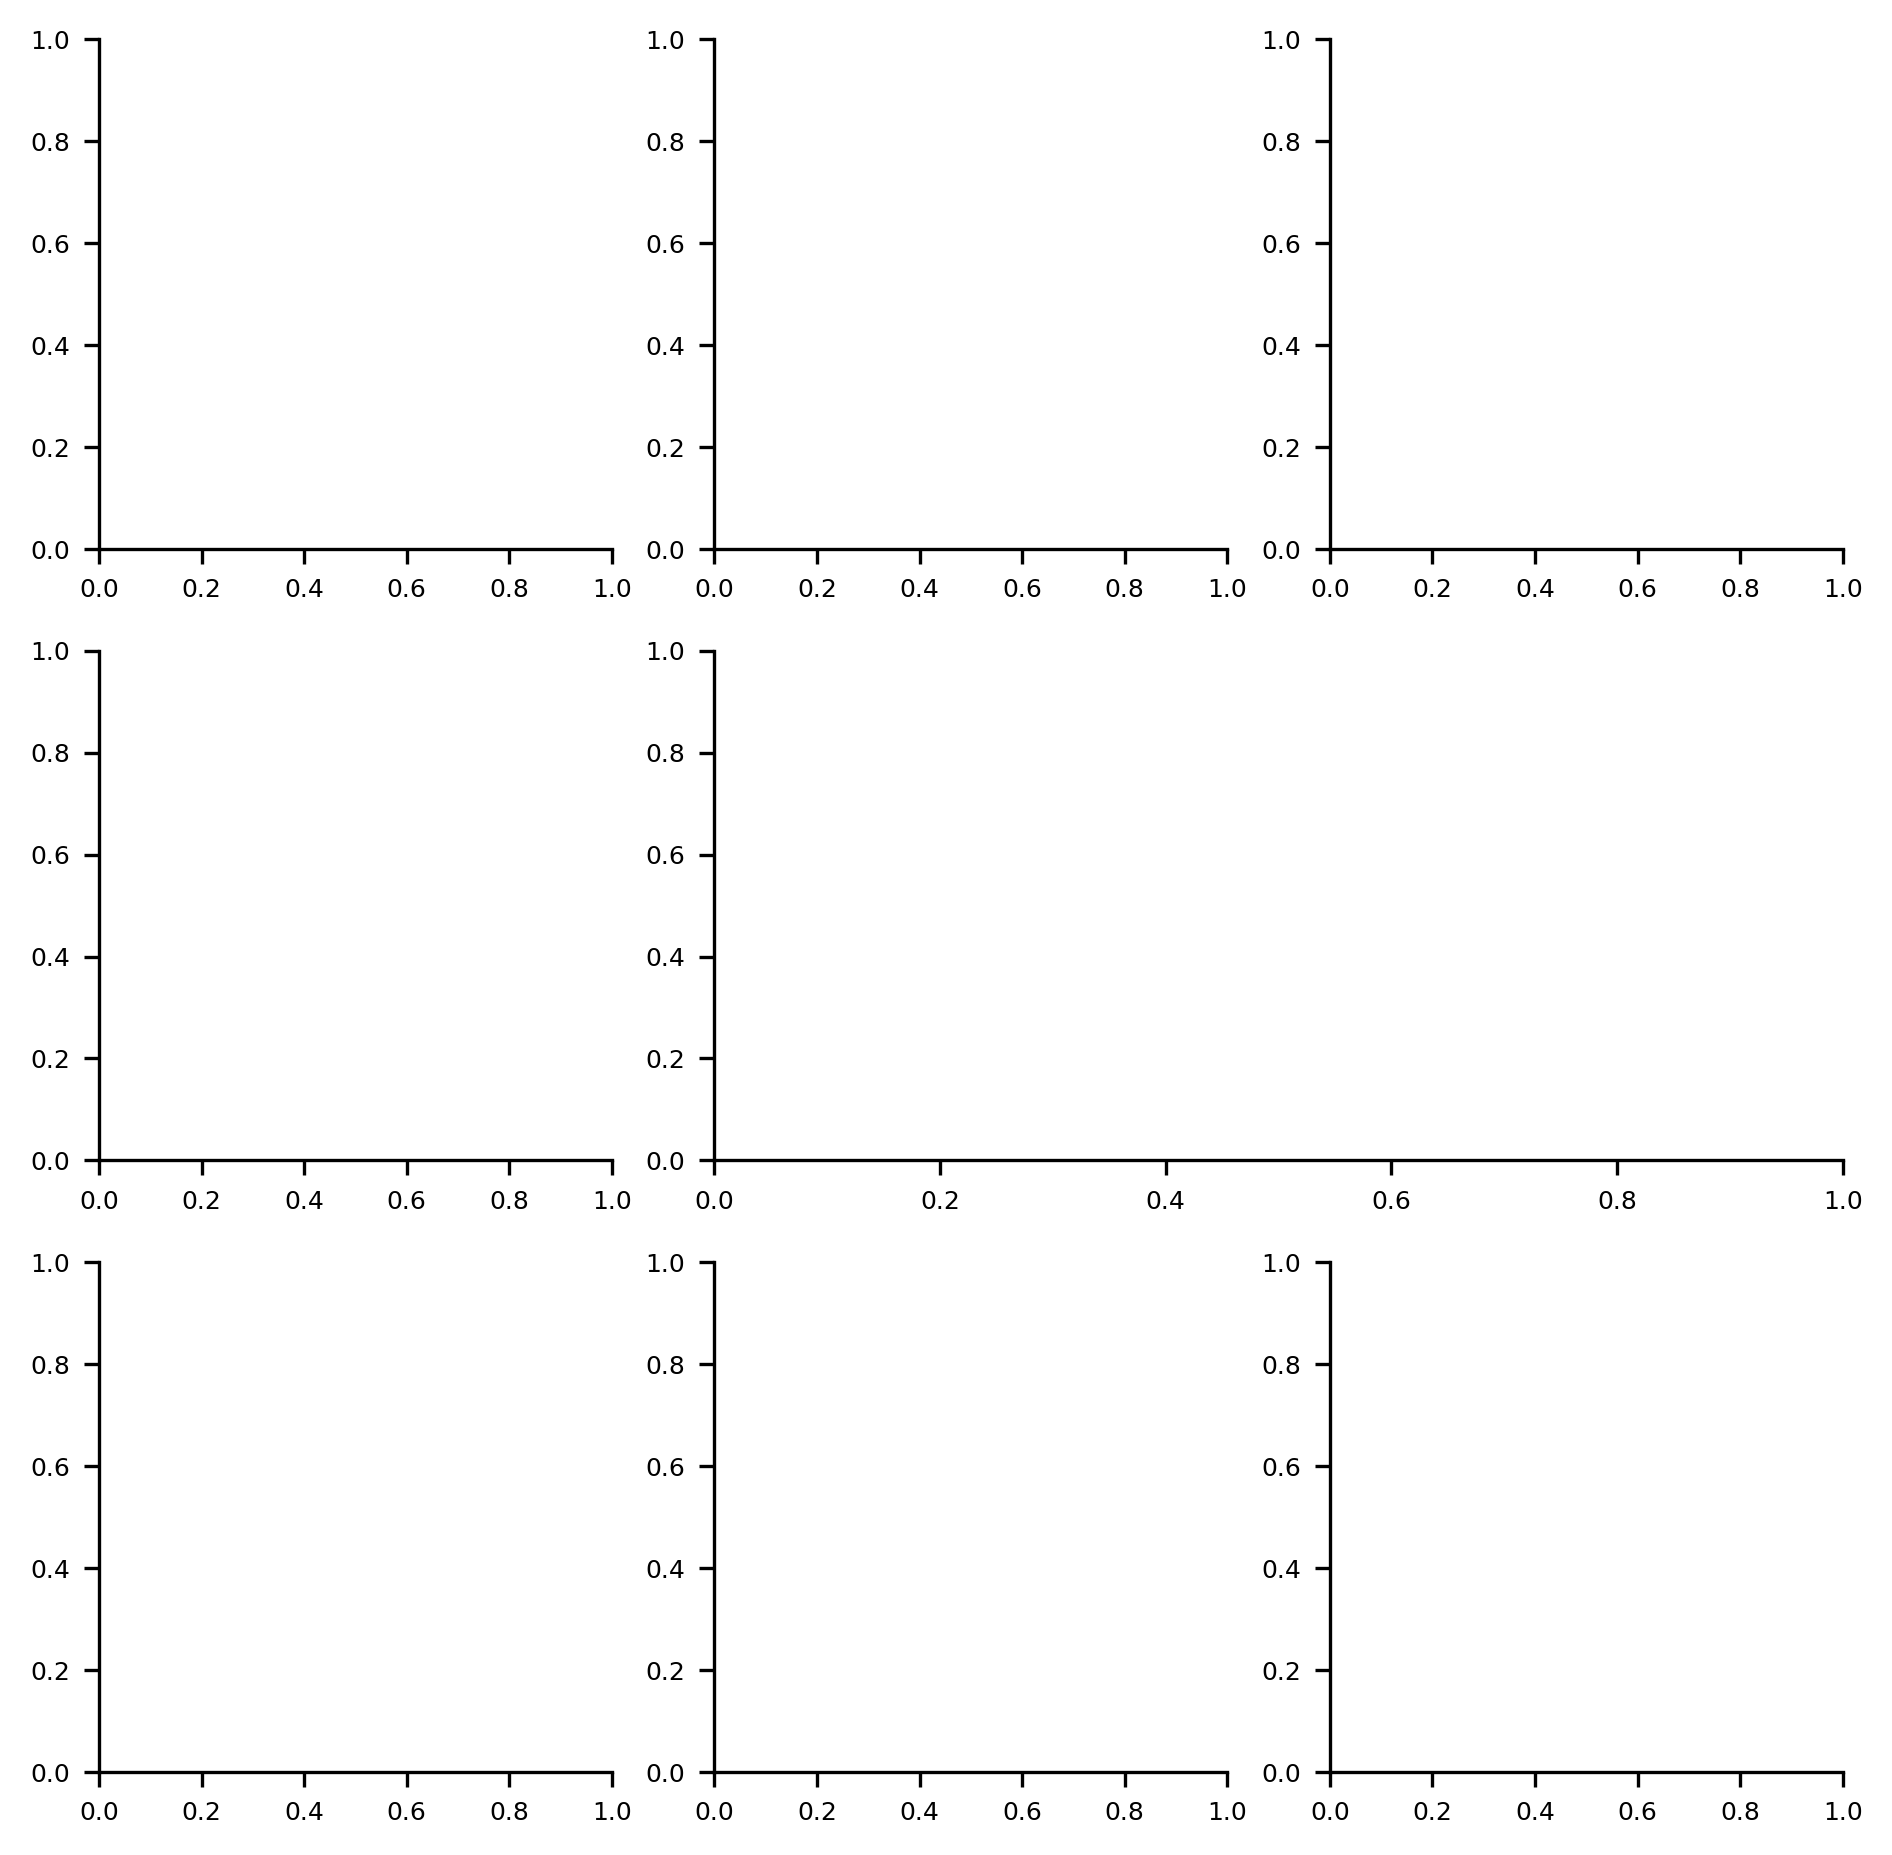

In [4]:
mosaic = [["A", "B", "C"], ["D", "E", "E"], ["F", "G", "H"]]
fig, axs = plot_helpers.create_pannels(mosaic=mosaic, h_pad=0)

In [5]:
menstrual_cycle = pickle.load(open(DATA_FOLDER + "menstrual_cycle_results.pkl", "rb"))

In [6]:
adata = menstrual_cycle["adata_stromal_tot"]
thetas = menstrual_cycle["thetas_tot"]
thetas_aligned = utils.normalize_angles(-thetas - 1 / 4 * np.pi)
thetas = thetas_aligned

In [7]:
adata.obs.head(10).iloc[:, :20]

,n_genes,sample,library,Processing,Treatment,10x kit,percent_mito,n_counts,scrublet_score,genotype,Library_genotype,Group,discard_lowQC,Endometriosis_stage,Hormonal treatment,Age,Binary Stage,Stage,phase,dataset
UA_Endo11596521_GAACACTCAGAGAAAG,2282,UA_Endo11596521_FX1236,UA_Endo11596521,Frozen,None,3' v3.0,0.014294,4967.0,0.334630,FX1236,UA_Endo11596521_FX1236,Endo_Superficial,no,2,nan,35.0,Proliferative,Proliferative,G1,Mareckova_Nuclei
UA_Endo12449301_TCAGTGATCGTAGGGA,2071,UA_Endo12449301_FX1150,UA_Endo12449301,Frozen,None,3' v3.0,0.004569,3064.0,0.166102,FX1150,UA_Endo12449301_FX1150,Endo_Superficial,no,1,nan,24.0,Proliferative,Proliferative,G1,Mareckova_Nuclei
UA_Endo10281925_AGGTAGGTCCTCACTG,2053,UA_Endo10281925_FX1101,UA_Endo10281925,Frozen,Percoll,3' v3.1,0.000609,3284.0,0.052216,FX1101,UA_Endo10281925_FX1101,Endo_Superficial,no,4,nan,36.0,Proliferative,Proliferative,S,Mareckova_Nuclei
UA_Endo11173482_TATTTCGGTGCCTGCA,1880,UA_Endo11173482_FX9011,UA_Endo11173482,Frozen,Mixed,3' v3.0,0.006807,3085.0,0.163243,FX9011,UA_Endo11173482_FX9011,Ctrl_Superficial,no,0,nan,18.0,Secretory,Secretory Mid,G1,Mareckova_Nuclei
UA_Endo10281925_AGCGTATCAGAAGTTA,2200,UA_Endo10281925_FX1101,UA_Endo10281925,Frozen,Percoll,3' v3.1,0.001742,3445.0,0.211538,FX1101,UA_Endo10281925_FX1101,Endo_Superficial,no,4,nan,36.0,Proliferative,Proliferative,S,Mareckova_Nuclei
UA_Endo10281926_AACAACCTCCGCTGTT,2330,UA_Endo10281926_FX1101,UA_Endo10281926,Frozen,Percoll,3' v3.1,0.001550,3870.0,0.101302,FX1101,UA_Endo10281926_FX1101,Endo_Superficial,no,4,nan,36.0,Proliferative,Proliferative,G2M,Mareckova_Nuclei
UA_Endo10281926_ACGTACAGTGTCATCA,4124,UA_Endo10281926_FX1101,UA_Endo10281926,Frozen,Percoll,3' v3.1,0.000121,8269.0,0.095604,FX1101,UA_Endo10281926_FX1101,Endo_Superficial,no,4,nan,36.0,Proliferative,Proliferative,G2M,Mareckova_Nuclei
UA_Endo10281926_GGGACCTGTCTACGAT,2272,UA_Endo10281926_FX1101,UA_Endo10281926,Frozen,Percoll,3' v3.1,0.001140,4385.0,0.024464,FX1101,UA_Endo10281926_FX1101,Endo_Superficial,no,4,nan,36.0,Proliferative,Proliferative,G1,Mareckova_Nuclei
UA_Endo12865963_ACCAAACGTTCGGCGT,3183,UA_Endo12865963_FX1087,UA_Endo12865963,Frozen,None,3' v3.1,0.010241,5761.0,0.061647,FX1087,UA_Endo12865963_FX1087,Endo_Superficial,no,1,nan,26.0,Secretory,Secretory Mid,G1,Mareckova_Nuclei
UA_Endo11282193_GGAAGTGTCTTCTGTA,3205,UA_Endo11282193_FX1146,UA_Endo11282193,Frozen,None,3' v3.0,0.025624,6010.0,0.189529,FX1146,UA_Endo11282193_FX1146,Ctrl_Superficial,no,0,nan,37.0,Proliferative,Proliferative,S,Mareckova_Nuclei


In [8]:
adata.obs["Stage"].unique()

['Proliferative', 'Secretory Mid', 'Secretory Early', 'Hormones', 'Proliferative Disordered', 'Menstrual', 'Secretory', 'Proliferative Late', 'Proliferative Menstrual']
Categories (9, object): ['Hormones', 'Menstrual', 'Proliferative', 'Proliferative Disordered', ..., 'Proliferative Menstrual', 'Secretory', 'Secretory Early', 'Secretory Mid']

In [9]:
adata.obs["Stage"].cat.categories.drop("Hormones")

Index(['Menstrual', 'Proliferative', 'Proliferative Disordered',
       'Proliferative Late', 'Proliferative Menstrual', 'Secretory',
       'Secretory Early', 'Secretory Mid'],
      dtype='object')

In [10]:
from scipy.stats import circstd

# remove hormonal treatment
i = adata.obs["Hormonal treatment"] == "nan"
ax = axs["A"]
plotting.modify_axis_labels(ax=ax, step=0.5)
adata.obs["Annotated Stage"] = adata.obs["Stage"]
hue_order = adata.obs["Stage"].cat.categories.drop("Hormones")
sns.histplot(
    adata.obs[i],
    x=thetas[i],
    hue="sample",
    stat="density",
    bins=30,
    ax=ax,
    element="poly",
    common_norm=False,
    legend=False,
    fill=True,
)
# compute circular std per sample
sample_circstd = (
    adata.obs[i]
    .groupby("sample", observed=True)
    .apply(
        lambda x: circstd(x["inferred_theta"], high=np.pi, low=-np.pi),
        include_groups=False,
    )
)
# add text to plot
mean_circstd = sample_circstd.mean()
# convert in fractions of pi
mean_circstd = mean_circstd / np.pi
ax.set_title(f"Inferred Phase Variance\n(cStd: {mean_circstd:.2f}π)")
ax.set_xlabel("Inferred Phase")
ax.legend(title="Sample ID", loc="upper right")

/tmp/ipykernel_1478154/1300197927.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Sample ID", loc="upper right")


In [11]:
df_fourrier = pd.DataFrame(
    menstrual_cycle["fourier_coefficients"],
    index=menstrual_cycle["variable_genes"],
    columns=["Cos1", "Sin1", "Cos2", "Sin2", "Cos3", "Sin3"],
)
mean_expression = (
    adata[:, menstrual_cycle["variable_genes"]].layers["total"].mean(axis=0)
)
df_fourrier["Amplitude1"] = np.sqrt(df_fourrier["Cos1"] ** 2 + df_fourrier["Sin1"] ** 2)
df_fourrier["Amplitude2"] = np.sqrt(df_fourrier["Cos2"] ** 2 + df_fourrier["Sin2"] ** 2)
df_fourrier["Amplitude3"] = np.sqrt(df_fourrier["Cos3"] ** 2 + df_fourrier["Sin3"] ** 2)
df_fourrier["Mean_Expression"] = np.array(mean_expression).flatten()
df_fourrier["Score1"] = (
    np.log(1 + df_fourrier["Amplitude1"]) * df_fourrier["Mean_Expression"]
)
df_fourrier["Score2"] = (
    np.log(1 + df_fourrier["Amplitude2"]) * df_fourrier["Mean_Expression"]
)
df_fourrier["Score3"] = (
    np.log(1 + df_fourrier["Amplitude3"]) * df_fourrier["Mean_Expression"]
)
df_fourrier = df_fourrier.sort_values("Score1", ascending=False)

df_fourrier

,Cos1,Sin1,Cos2,Sin2,Cos3,Sin3,Amplitude1,Amplitude2,Amplitude3,Mean_Expression,Score1,Score2,Score3
KCNIP4,2.462063,-0.403428,-0.016615,0.194595,-0.225355,-0.102505,2.494897,0.195303,0.247572,31.436304,39.336365,5.608227,6.953692
RORA,-0.745853,-0.228394,0.382531,0.104208,-0.274361,0.042268,0.780038,0.396471,0.277597,17.424286,10.047453,5.818816,4.268624
LSAMP,0.800407,-0.522170,0.081335,0.062175,-0.147942,0.145955,0.955674,0.102378,0.207821,12.941807,8.680523,1.261431,2.443648
PLCL1,-1.451647,-0.837783,-0.099187,-0.002511,0.022410,0.204102,1.676055,0.099218,0.205328,7.526747,7.408906,0.712025,1.405636
SFRP4,1.688394,-0.158663,-0.228057,0.334257,-0.105743,-0.006706,1.695833,0.404645,0.105956,6.828661,6.772032,2.320276,0.687714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAJ47,0.236953,0.223005,-0.996605,0.555321,0.884224,-1.190520,0.325389,1.140879,1.482967,0.000098,0.000028,0.000075,0.000089
AC093534.2,-0.332805,-0.613982,-1.101004,0.438694,0.663252,0.787809,0.698379,1.185184,1.029828,0.000049,0.000026,0.000038,0.000035
CCDC70,-0.028888,0.228553,-0.792139,-0.027908,0.918067,-0.515476,0.230371,0.792631,1.052883,0.000115,0.000024,0.000067,0.000082
AC012301.2,-0.145425,-0.278766,1.004836,1.099396,-0.440663,-0.918594,0.314419,1.489418,1.018822,0.000082,0.000022,0.000075,0.000058


In [12]:
# plot df fourrier on a circular plot

plot_helpers.make_polar(axs, "B")
ax = axs["B"]
# set 0 to top
ax.set_theta_zero_location("N")
# set clockwise
ax.set_theta_direction(-1)
ax.scatter(
    utils.normalize_angles(
        (-np.arctan2(df_fourrier["Sin1"], df_fourrier["Cos1"]) - 1 / 4 * np.pi) + np.pi
    ),
    df_fourrier["Amplitude1"],
    s=df_fourrier["Mean_Expression"],
    alpha=0.7,
)
for genes in [
    "MTUS2",
    "MMP11",
    "CXCL14",
    "SGIP1",
    "HCN1",
    "PAEP",
    "LHFPL3",
    "KCNIP4-IT1",
    "SCGB1D2",
]:
    angle = utils.normalize_angles(
        (
            -np.arctan2(df_fourrier.loc[genes, "Sin1"], df_fourrier.loc[genes, "Cos1"])
            - 1 / 4 * np.pi
        )
        + np.pi
    )
    radius = df_fourrier.loc[genes, "Amplitude1"]
    ax.text(
        angle,
        radius,
        genes,
        fontsize=constants.TINY_SIZE,
        ha="center",
        va="center",
        rotation_mode="anchor",
    )
# set ylabel to 1,2,3
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(["", "", ""])
ax.set_xticks(np.pi / 3 * np.arange(6))
ax.set_xticklabels([""] * 6)
# add extra rings for menstrual cycle phases

colors = sns.color_palette("Dark2", 3)
r_max = np.nanmax(df_fourrier["Amplitude1"])
r0 = r_max + 0.15  # ring center radius
h = 0.1  # ring thickness
# 0 from 0 to π/2
ax.bar(
    x=0,
    height=h,
    width=np.pi / 2,
    bottom=r0,
    color=colors[0],
    edgecolor="none",
    align="edge",
    label="Menstrual",
)
# 1 from π/2 to π
ax.bar(
    x=np.pi / 2,
    height=h,
    width=np.pi / 2,
    bottom=r0,
    color=colors[1],
    edgecolor="none",
    align="edge",
    label="Proliferative",
)
# 2 from π to 2π
ax.bar(
    x=np.pi,
    height=h,
    width=np.pi,
    bottom=r0,
    color=colors[2],
    edgecolor="none",
    align="edge",
    label="Secretory",
)
ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))

In [13]:
# remove hormonal treatment
i = adata.obs["Hormonal treatment"] == "nan"
ax = axs["C"]
plotting.modify_axis_labels(ax=ax, step=0.5)
# number of patients with endometriosis
df_to_plot = {
    "has_endometriosis": adata.obs["has_endometriosis"],
    "patient_id": adata.obs["sample"],
    "inferred_phase": thetas,
}
df_to_plot = pd.DataFrame(df_to_plot)
# bin the inferred phase
df_to_plot["binned_phase"] = pd.cut(
    df_to_plot["inferred_phase"],
    bins=30,
    labels=np.linspace(-np.pi, np.pi, 30),
)
df_to_plot["binned_phase"] = df_to_plot["binned_phase"].astype(float)
df_to_plot = (
    df_to_plot.groupby(["binned_phase", "has_endometriosis"])["patient_id"]
    .apply(lambda x: (x.value_counts() > 20).sum())
    .unstack()
    .fillna(0)
)
sns.lineplot(
    data=df_to_plot,
    x=df_to_plot.index,
    y=df_to_plot.loc[:, False],
    c=sns.color_palette("tab10")[0],
    label="False",
    ax=ax,
)
sns.lineplot(
    data=df_to_plot,
    x=df_to_plot.index,
    y=df_to_plot.loc[:, True],
    # tab 10 color 1
    c=sns.color_palette("tab10")[1],
    label="True",
    ax=ax,
)
ax.set_title("#Patients per Inferred Phase")
ax.set_xlabel("Inferred Phase")
ax.set_ylabel("#Patients with >20 cells")
ax.legend(title="Endometriosis")
ax.set_ylim(0, None)

(0.0, 14.65)

In [14]:
cell_cycle = pickle.load(open(DATA_FOLDER + "cell_cycle_results.pkl", "rb"))

In [15]:
def get_gene_fractions(gene_name, adata, layer="total"):
    library_size = adata.layers[layer].sum(axis=1)
    library_size = np.array(library_size).flatten()
    gene_fractions = (
        adata[:, gene_name].layers[layer].toarray().flatten() / library_size
    )
    return gene_fractions


def plot_gene_profiles(
    gene_names,
    adata,
    inferred_phase,
    axs,
    position,
    layer="total",
    hue=None,
    legend_title=None,
):
    axs = plot_helpers.replace_mosaic_cell_with_grid(
        fig, axs, label=position, nrows=1, ncols=len(gene_names)
    )
    for i in range(len(gene_names)):
        gene_name = gene_names[i]
        gene_fractions = get_gene_fractions(gene_name, adata, layer=layer)
        _, axs[position][i] = plotting.modify_axis_labels(
            ax=axs[position][i], axis="x", step=0.5
        )
        plotting.plot_smoothed_profiles(
            inferred_phase,
            np.log2(gene_fractions * 1e4 + 1),
            ax=axs[position][i],
            nbins=20,
            xlabel="Inferred Phase",
            ylabel=f"Normalized Counts (log)" if i == 0 else None,
            title=f"{gene_name} Profile",
            legend=i == len(gene_names) - 1,
            hue=hue,
        )
        if i == len(gene_names) - 1 and legend_title is not None:
            axs[position][i].legend(title=legend_title)

In [17]:
axs = plot_helpers.make_polar(axs, "D")
plotting.plot_cell_cycle(cell_cycle["df_f"], ax=axs["D"])

/home/maxine/Documents/paychere/cell_cycle_VAE_Fourrier_model/src/CoPhaser/plotting.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


In [18]:
thetas = cell_cycle["thetas"].detach().cpu().numpy()

In [19]:
adata_cell_cycle = cell_cycle["adata"]

In [20]:
adata_cell_cycle.obs.columns

Index(['n_genes', 'sample', 'library', 'Processing', 'Treatment', '10x kit',
       'percent_mito', 'n_counts', 'scrublet_score', 'genotype',
       'Library_genotype', 'Group', 'discard_lowQC', 'Endometriosis_stage',
       'Hormonal treatment', 'Age', 'Binary Stage', 'Stage', 'phase',
       'dataset', 'Biopsy_type', 'Tissue_sampled', 'LT_celltype',
       'LT_epi_celltype', 'LT_mesen_celltype', 'Endometrial_pathology',
       'celltype', 'lineage', 'label_long'],
      dtype='object')

In [21]:
adata_cell_cycle.obs["has_endometriosis"] = (
    adata_cell_cycle.obs["Endometriosis_stage"].astype(int) > 0
)

In [22]:
plot_gene_profiles(
    ["MCM6", "PCNA", "TOP2A"],
    adata_cell_cycle,
    thetas,
    axs,
    position="E",
    layer="total",
    hue=adata_cell_cycle.obs["has_endometriosis"],
    legend_title="Endometriosis",
)

In [23]:
thetas[cell_cycle["cycling_cells"]]

array([ 2.402345  , -2.8289063 , -2.1398156 , ...,  0.2281766 ,
        0.27662182, -0.13702631], dtype=float32)

In [24]:
from CoPhaser import gene_sets

small_cycle_genes = gene_sets.SMALL_CELL_CYCLE_GENE_SET

In [25]:
proliferating_cells = (cell_cycle["cycling_cells"]) & (thetas > 0)
df_proliferating = pd.DataFrame(
    {
        "proliferating_status": proliferating_cells,
        "cell_type": adata_cell_cycle.obs["celltype"].str.strip().values,
        "patient_id": adata_cell_cycle.obs["genotype"].values,
        "binary_stage": adata_cell_cycle.obs["Binary Stage"].values,
    }
)


# Compute patient-level means
patient_means = (
    df_proliferating.groupby(["cell_type", "patient_id"])["proliferating_status"]
    .mean()
    .reset_index()
)

# Organize values per subtype
subtype_groups = {
    subtype: df["proliferating_status"].values
    for subtype, df in patient_means.groupby("cell_type")
}

# Now compute mean + SEM across patients within each subtype
summary = (
    patient_means.groupby(["cell_type", "patient_id"])["proliferating_status"]
    .mean()
    .groupby("cell_type")
    .agg(mean="mean", sem="sem")
    .reset_index()
)

# Barplot with SEM
ax = axs["F"]
# sort summary by mean descending
summary = summary.sort_values(by="mean", ascending=False).head(10)
summary = summary.drop(summary[summary["cell_type"] == "Unknown"].index)
ax.bar(
    summary["cell_type"],
    summary["mean"],
    yerr=summary["sem"],
    capsize=5,
    color=sns.color_palette("tab10", n_colors=len(summary)),
)

ax.set_ylabel("Proliferating Cells Fraction")
ax.set_xlabel("Cell Type")
ax.set_title("Proliferating Cells Fraction")
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

/tmp/ipykernel_1478154/1725089739.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proliferating.groupby(["cell_type", "patient_id"])["proliferating_status"]
/tmp/ipykernel_1478154/1725089739.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patient_means.groupby(["cell_type", "patient_id"])["proliferating_status"]
/tmp/ipykernel_1478154/1725089739.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


[Text(0, 0, 'Cycling'),
 Text(1, 0, 'eStromal_cycling'),
 Text(2, 0, 'ePV_1b'),
 Text(3, 0, 'preCiliated'),
 Text(4, 0, 'SOX9_luminal'),
 Text(5, 0, 'preLuminal'),
 Text(6, 0, 'Immune_Lymphoid'),
 Text(7, 0, 'Immune_Myeloid'),
 Text(8, 0, 'Ciliated'),
 Text(9, 0, 'Lymphatic')]

In [26]:
cycling_cell_types = summary["cell_type"].head(5).values.tolist()

In [27]:
proliferating_cells = (cell_cycle["cycling_cells"]) & (thetas > 0)
df_proliferating = pd.DataFrame(
    {
        "proliferating_status": proliferating_cells,
        "cell_type": adata_cell_cycle.obs["Binary Stage"].str.strip().values,
        "patient_id": adata_cell_cycle.obs["genotype"].values,
        "binary_stage": adata_cell_cycle.obs["Binary Stage"].values,
    }
)


# Compute patient-level means
patient_means = (
    df_proliferating.groupby(["cell_type", "patient_id"])["proliferating_status"]
    .mean()
    .reset_index()
)

# Organize values per subtype
subtype_groups = {
    subtype: df["proliferating_status"].values
    for subtype, df in patient_means.groupby("cell_type")
}

# Now compute mean + SEM across patients within each subtype
summary = (
    patient_means.groupby(["cell_type", "patient_id"])["proliferating_status"]
    .mean()
    .groupby("cell_type")
    .agg(mean="mean", sem="sem")
    .reset_index()
)

# Barplot with SEM
ax = axs["G"]
# sort summary by mean descending
summary = summary.sort_values(by="mean", ascending=False)
summary = summary.drop(summary[summary["cell_type"] == "Unknown"].index)
ax.bar(
    summary["cell_type"],
    summary["mean"],
    yerr=summary["sem"],
    capsize=5,
    color=sns.color_palette("tab10", n_colors=len(summary)),
)

ax.set_ylabel("Proliferating Cells Fraction")
ax.set_xlabel("Stage")
ax.set_title("Proliferating Cells Fraction")
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

/tmp/ipykernel_1478154/3763652782.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proliferating.groupby(["cell_type", "patient_id"])["proliferating_status"]
/tmp/ipykernel_1478154/3763652782.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patient_means.groupby(["cell_type", "patient_id"])["proliferating_status"]
/tmp/ipykernel_1478154/3763652782.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


[Text(0, 0, 'Proliferative'),
 Text(1, 0, 'Secretory'),
 Text(2, 0, 'Hormones'),
 Text(3, 0, 'Menstrual')]

In [28]:
# clock genes
cycling_genes = [
    g.upper() for g in small_cycle_genes if g.upper() in cell_cycle["df_z"].columns
]
df_to_plot = cell_cycle["df_z"][cycling_genes].copy()
df_to_plot["has_endometriosis"] = (
    adata_cell_cycle.obs["has_endometriosis"].astype(str).values
)
df_to_plot["leiden"] = adata_cell_cycle.obs["celltype"].astype(str).values
df_to_plot = df_to_plot[df_to_plot["leiden"].isin(cycling_cell_types)]
df_to_plot["leiden"] = df_to_plot["leiden"] + "_" + df_to_plot["has_endometriosis"]
df_to_plot = df_to_plot.drop(columns=["has_endometriosis"])
# df_to_plot = df_to_plot[df_to_plot["leiden"].isin(["0", "1", "2"])]
df_to_plot = df_to_plot.groupby("leiden").mean()
df_to_plot = df_to_plot.T
# remove mean
df_to_plot = df_to_plot.sub(df_to_plot.mean(axis=1), axis=0)
# sort by mean difference between _True and False
mean_diffs = (
    (df_to_plot.filter(like="_True") - df_to_plot.filter(like="_False"))
    .abs()
    .mean(axis=1)
)
df_to_plot = df_to_plot.loc[mean_diffs.abs().sort_values(ascending=False).index]
# add \n to cell type labels for even indexes
# for i, ct in enumerate(df_to_plot.columns):
#     if i % 2 == 1:
#         df_to_plot.columns.values[i] = "\n" + ct
# _,ax = plt.subplots(figsize=(12, 12))
# sns.heatmap(
#     df_to_plot,
#     cmap="magma",
#     cbar_kws={"label": "Mean Δμ"},
#     yticklabels=True,
#     xticklabels=True,
#     vmin=-2.5,
#     ax=ax,
# )
# # rotate x labels
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# ax.set_title("Predicted Δμ")

In [29]:
has_endo = df_to_plot.filter(like="_True")
has_endo.columns = [df.split("_")[0] for df in has_endo.columns]
no_endo = df_to_plot.filter(like="_False")
no_endo.columns = [df.split("_")[0] for df in no_endo.columns]
diff = np.exp((has_endo - no_endo).abs())
diff.mean(axis=1)
# sort by mean difference
diff = diff.loc[diff.mean(axis=1).sort_values(ascending=False).index].head(10)
ax = axs["H"]
sns.heatmap(
    diff,
    cmap="magma",
    cbar_kws={"label": "Mean Fold Change"},
    yticklabels=True,
    xticklabels=True,
    vmin=1,
    ax=ax,
)
ax.set_title("Inferred Fold Change")
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

[Text(0.5, 0, 'Cycling'),
 Text(1.5, 0, 'SOX9'),
 Text(2.5, 0, 'ePV'),
 Text(3.5, 0, 'eStromal'),
 Text(4.5, 0, 'preCiliated')]

Figure saved to: /home/maxine/Documents/paychere/cell_cycle_VAE_Fourrier_model/paper/figures/figure_S9_menstrual_python.svg


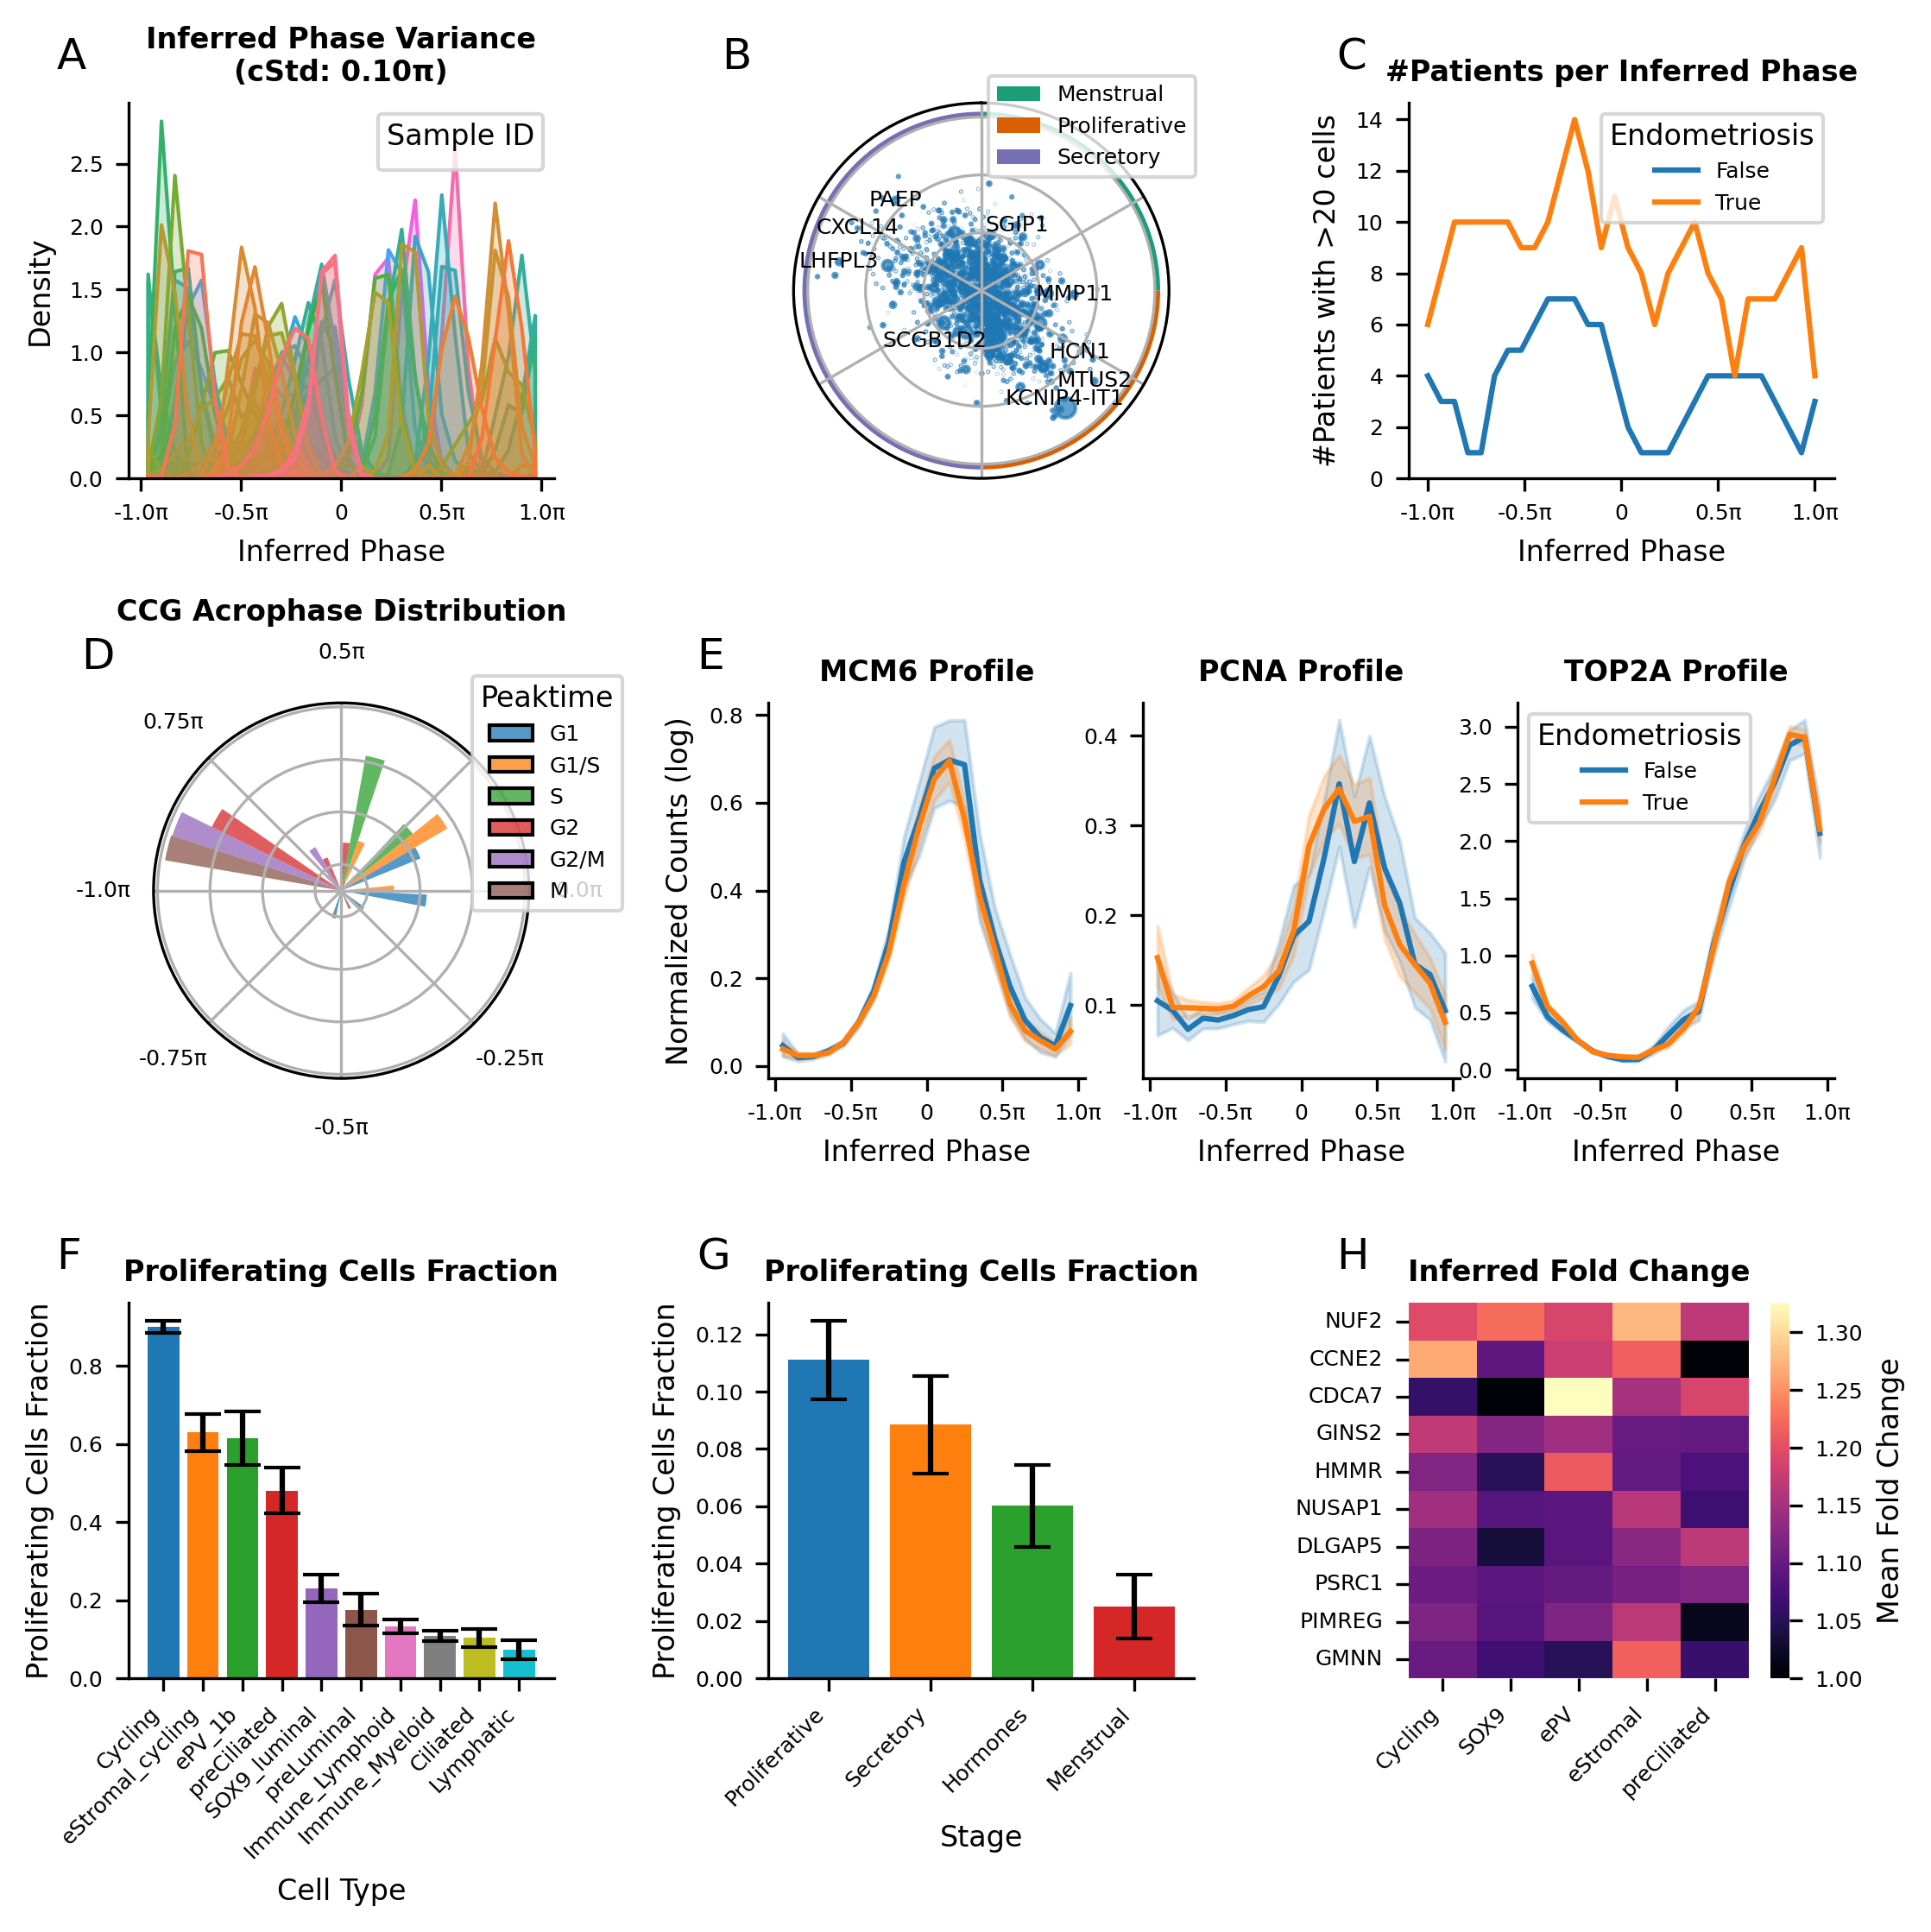

In [30]:
plot_helpers.label_panels_mosaic(fig, axs, mosaic)
plot_helpers.save_figure(fig, axs, "figure_S9_menstrual_python")